In [2]:
import pandas as pd
from pathlib import Path
import scipy.stats as stat
import numpy as np
from statistics import median
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('ggplot')

In [3]:
path_to_data = "./data/EDTG_Data.xls"

In [4]:
df = pd.read_excel(path_to_data)  # load up the data
df.head() # and let's just take a look at it

,gname,gid,year,end,duration,base,num_base,mul_bases,EAP,ECA,...,num_enemies,fate_leader,total_deaths,total_injuries,terr_deaths,terr_injuries,nonterr_deaths,nonterr_injuries,terr_casualties,nonterr_casualties
0,1920 Revolution Brigades,1,2003,0,1,Iraq,1,0,0,0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1920 Revolution Brigades,1,2004,0,2,Iraq,1,0,0,0,...,NaN,0.0,15.0,19.0,1.0,0.0,14.0,19.0,1.0,33.0
2,1920 Revolution Brigades,1,2005,0,3,Iraq,1,0,0,0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1920 Revolution Brigades,1,2006,0,4,Iraq,1,0,0,0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1920 Revolution Brigades,1,2007,1,5,Iraq,1,0,0,0,...,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
right_wingers = df[
    df["right"] == 1
]

left_wingers=df[
    df['left'] == 1
]

right_wingers.head() #Al-Arifeen, huh! They're pretty devoutly religious.
left_wingers.head()

,gname,gid,year,end,duration,base,num_base,mul_bases,EAP,ECA,...,num_enemies,fate_leader,total_deaths,total_injuries,terr_deaths,terr_injuries,nonterr_deaths,nonterr_injuries,terr_casualties,nonterr_casualties
5,23rd of September Communist League,2,1973,0,1,Mexico,1,0,0,0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,23rd of September Communist League,2,1974,0,2,Mexico,1,0,0,0,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,23rd of September Communist League,2,1975,0,3,Mexico,1,0,0,0,...,NaN,1.0,32.0,4.0,0.0,0.0,32.0,4.0,0.0,36.0
8,23rd of September Communist League,2,1976,0,4,Mexico,1,0,0,0,...,NaN,0.0,24.0,5.0,0.0,0.0,24.0,5.0,0.0,29.0
9,23rd of September Communist League,2,1977,0,5,Mexico,1,0,0,0,...,NaN,2.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,7.0


In [6]:
# I want to know whether, of right-wing groups, the religiously motivated ones are significantly different 
# in terms of longevity, lethality, or membership, than non-religious ones.

In [7]:
# first lets figure out some basic things about the population that we're examiniung
pop_longevities = {}
unique_groups = df['gname'].unique()
for group in unique_groups:
        entries = df[
            df['gname'] == group
        ]['duration']
        
        pop_longevities[group] = entries.max()

p_std_dev = stat.tstd(list(pop_longevities.values()))
print(p_std_dev) # this aligns with findings that many terrorist groups are 'one-hit wonders'

12.270618829998693


In [8]:
# I want to begin by figuring out their respective average longevities, but first I'm going to clean the data
# into smaller sub-tables so that I don't have to worry about the duplicates
uq_rw = right_wingers['gname'].unique()
r_longevities = {}
for group in uq_rw:
    group_entries = right_wingers[
       right_wingers['gname'] == group
    ]['duration']
    
    r_longevities[group] = group_entries.max()
    
r_std_dev = stat.tstd(list(r_longevities.values()))  

uq_lw = left_wingers['gname'].unique()
l_longevities = {}
for group in uq_lw:
    group_entries = left_wingers[
        left_wingers['gname'] == group
    ]['duration']
    
    l_longevities[group] = group_entries.max()
l_std_dev = stat.tstd(list(l_longevities.values()))

print("right-wing stdev:", r_std_dev)
print("left-wing stdev:", l_std_dev)

right-wing stdev: 9.34025353694715
left-wing stdev: 11.592012533686798


In [9]:
# it makes sense that the standard deviation would be smaller for samples than for the population
# now i want to know the population and sample means

In [10]:
pop_mean = np.mean(list(pop_longevities.values()))
l_mean = np.mean(list(l_longevities.values()))
r_mean = np.mean(list(r_longevities.values()))

print("pop_mean", pop_mean, "left_mean", l_mean, "right_mean", r_mean)

pop_mean 12.217105263157896 left_mean 11.546875 right_mean 7.628571428571429


In [11]:
# initial impression: both left-wing groups and right-wing groups are less long-lived than groups in the general
# population, but the right-wing groups are significantly less durable than both
# the data won't follow a normal distribution by the previous observation that some terrorist groups last for a very
# long time, while the majority are a flash in the pan

In [12]:
pop_mode = stat.mode(list(pop_longevities.values()))[0]
pop_median = median(list(pop_longevities.values()))
print("pop_median", pop_median, "pop_mode", pop_mode)

pop_median 8.0 pop_mode [1]


data set contains 760 groups


<IPython.core.display.Javascript object>


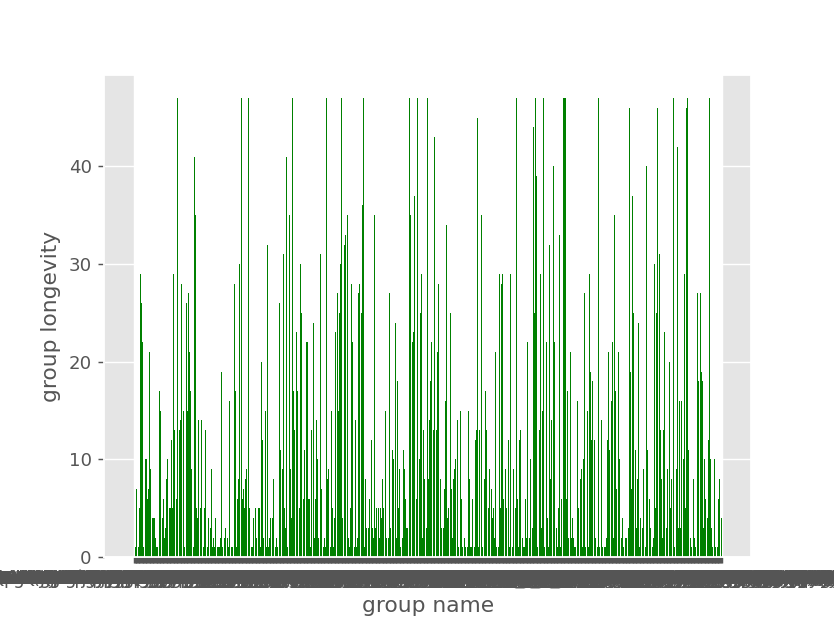

In [13]:
x = []
y = []
sorted_longevities = list(pop_longevities.items())
sorted_longevities.sort(key=lambda a: a[1])
for g, l in pop_longevities.items():
    x.append(g)
    y.append(l)

print("data set contains", len(x), "groups")
plt.bar(x, y, color='green')
plt.xlabel('group name')
plt.ylabel('group longevity')
plt.show()

In [14]:
distributions = [
    'norm',
    'expon',
    'logistic',
    'gumbel',
    'gumbel_l',
    'gumbel_r',
    'extreme1'
]

fits = []

for d in distributions:
    statistic, crits, sigs = stat.anderson([n for g,n in sorted_longevities], d)
    fits.append([d, statistic, crits, sigs])
for fit in fits:
    print(fit)

['norm', 43.792171731285634, array([0.573, 0.653, 0.783, 0.913, 1.086]), array([15. , 10. ,  5. ,  2.5,  1. ])]
['expon', 7.116966439458679, array([0.921, 1.077, 1.34 , 1.605, 1.955]), array([15. , 10. ,  5. ,  2.5,  1. ])]
['logistic', 33.88881211239004, array([0.426, 0.563, 0.66 , 0.769, 0.906, 1.01 ]), array([25. , 10. ,  5. ,  2.5,  1. ,  0.5])]
['gumbel', 65.70649681036707, array([0.471, 0.632, 0.752, 0.871, 1.031]), array([25. , 10. ,  5. ,  2.5,  1. ])]
['gumbel_l', 65.70649681036707, array([0.471, 0.632, 0.752, 0.871, 1.031]), array([25. , 10. ,  5. ,  2.5,  1. ])]
['gumbel_r', 25.279798661224163, array([0.471, 0.632, 0.752, 0.871, 1.031]), array([25. , 10. ,  5. ,  2.5,  1. ])]
['extreme1', 65.70649681036707, array([0.471, 0.632, 0.752, 0.871, 1.031]), array([25. , 10. ,  5. ,  2.5,  1. ])]


In [15]:
ks_fits = []
for d in distributions[:3]:
    ks_fits.append((d, *stat.kstest([n for g,n in sorted_longevities], d, N=760)))
for fit in ks_fits:
    print(fit)

('norm', 0.8413447460685429, 0.0)
('expon', 0.725191032552861, 0.0)
('logistic', 0.741323393767356, 0.0)


In [16]:
# so unfortunately, none of these metrics will be good for our dataset
# let's see if left and right at least approximate being drawn from a similar distribution, 
# even if we don't have a nice, clean model for what that distribution will look like

In [19]:
cross_fit = stat.ks_2samp(
    list(l_longevities.values()),
    list(r_longevities.values())
)
print(cross_fit)

KstestResult(statistic=0.22723214285714285, pvalue=0.07925560208366093)


In [27]:
# we'll try wilcoxon just to be safe
# I also want to know how large each of these samples is

print(len(list(l_longevities.values())), "groups in the left-wing sample")
print(len(list(r_longevities.values())), "groups in the right-wing sample")

# now that's interesting! There are more left-wing groups overall in the dataset

cross_fit = stat.wilcoxon(
    list(l_longevities.values()),
    list(r_longevities.values())
)
print(cross_fit)

192 groups in the left-wing sample
35 groups in the right-wing sample


ValueError: The samples x and y must have the same length.

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 2, 47: 2, 48: 2, 49: 2, 50: 2, 51: 2, 52: 2, 53: 2, 54: 2, 55: 2, 56: 2, 57: 2, 58: 2, 59: 2, 60: 2, 61: 2, 62: 2, 63: 2, 64: 3, 65: 3, 66: 3, 67: 3, 68: 3, 69: 3, 70: 3, 71: 3, 72: 3, 73: 3, 74: 3, 75: 3, 76: 3, 77: 3, 78: 4, 79: 4, 80: 4, 81: 4, 82: 4, 83: 4, 84: 4, 85: 4, 86: 4, 87: 4, 88: 4, 89: 5, 90: 5, 91: 5, 92: 5, 93: 5, 94: 5, 95: 6, 96: 6, 97: 6, 98: 6, 99: 6, 100: 6, 101: 6, 102: 6, 103: 6, 104: 6, 105: 6, 106: 6, 107: 7, 108: 7, 109: 7, 110: 7, 111: 8, 112: 8, 113: 8, 114: 8, 115: 8, 116: 8, 117: 8, 118: 8, 119: 8, 120: 8, 121: 8, 122: 8, 123: 8, 124: 8, 125: 9, 126: 9, 127: 9, 128: 9, 129: 9, 130: 9, 131: 9, 132: 9, 133: 9, 134: 9, 135: 9, 136: 9, 137: 10, 138: